NAMA : ARIO SYAWAL MUHAMMAD  
NIM : 1103201243

In [1]:
import numpy as no
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

data=data = pd.read_csv("edge_message_correlation_edit.csv")
data.head(10)

,Edge,Severity,Device_is_not_communicating_with_the_Orchestrator,Edge_USB_device_inserted,Invalid_device_settings_detected_configuration_may_be_incorrect,Link_GE3_is_now_DEAD,Link_GE4_is_now_DEAD
0,PM-VELO-TLKM-01,Alert,2,8,6,0,0
1,RMP-VELO-TLKM-01,Alert,2,8,4,0,0
2,RTR0063201,Alert,28,2,22,0,168
3,RTR0067501,Alert,26,2,14,54,82
4,RTR0312601,Error,61,2,97,30,40
5,RTR0317601,Alert,11,2,3,86,123
6,RTR0318301,Alert,18,2,17,40,95
7,RTR0318601,Alert,3,2,3,37,67
8,RTR0318701,Error,24,4,53,0,59
9,RTR0319001,Alert,8,6,19,8,39


In [2]:
avg_per_column = data.mean()

# Ganti nilai 0 dengan nilai rata-rata pada setiap kolom
data.replace(0, avg_per_column, inplace=True)

C:\Users\LEGION\AppData\Local\Temp\ipykernel_22232\2131340534.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg_per_column = data.mean()


In [3]:
cdf = data[['Device_is_not_communicating_with_the_Orchestrator','Invalid_device_settings_detected_configuration_may_be_incorrect','Link_GE3_is_now_DEAD','Link_GE4_is_now_DEAD','Edge_USB_device_inserted']]
cdf.head(10)

,Device_is_not_communicating_with_the_Orchestrator,Invalid_device_settings_detected_configuration_may_be_incorrect,Link_GE3_is_now_DEAD,Link_GE4_is_now_DEAD,Edge_USB_device_inserted
0,2,6.0,49.864686,108.894389,8.0
1,2,4.0,49.864686,108.894389,8.0
2,28,22.0,49.864686,168.000000,2.0
3,26,14.0,54.000000,82.000000,2.0
4,61,97.0,30.000000,40.000000,2.0
5,11,3.0,86.000000,123.000000,2.0
6,18,17.0,40.000000,95.000000,2.0
7,3,3.0,37.000000,67.000000,2.0
8,24,53.0,49.864686,59.000000,4.0
9,8,19.0,8.000000,39.000000,6.0


<Axes: >

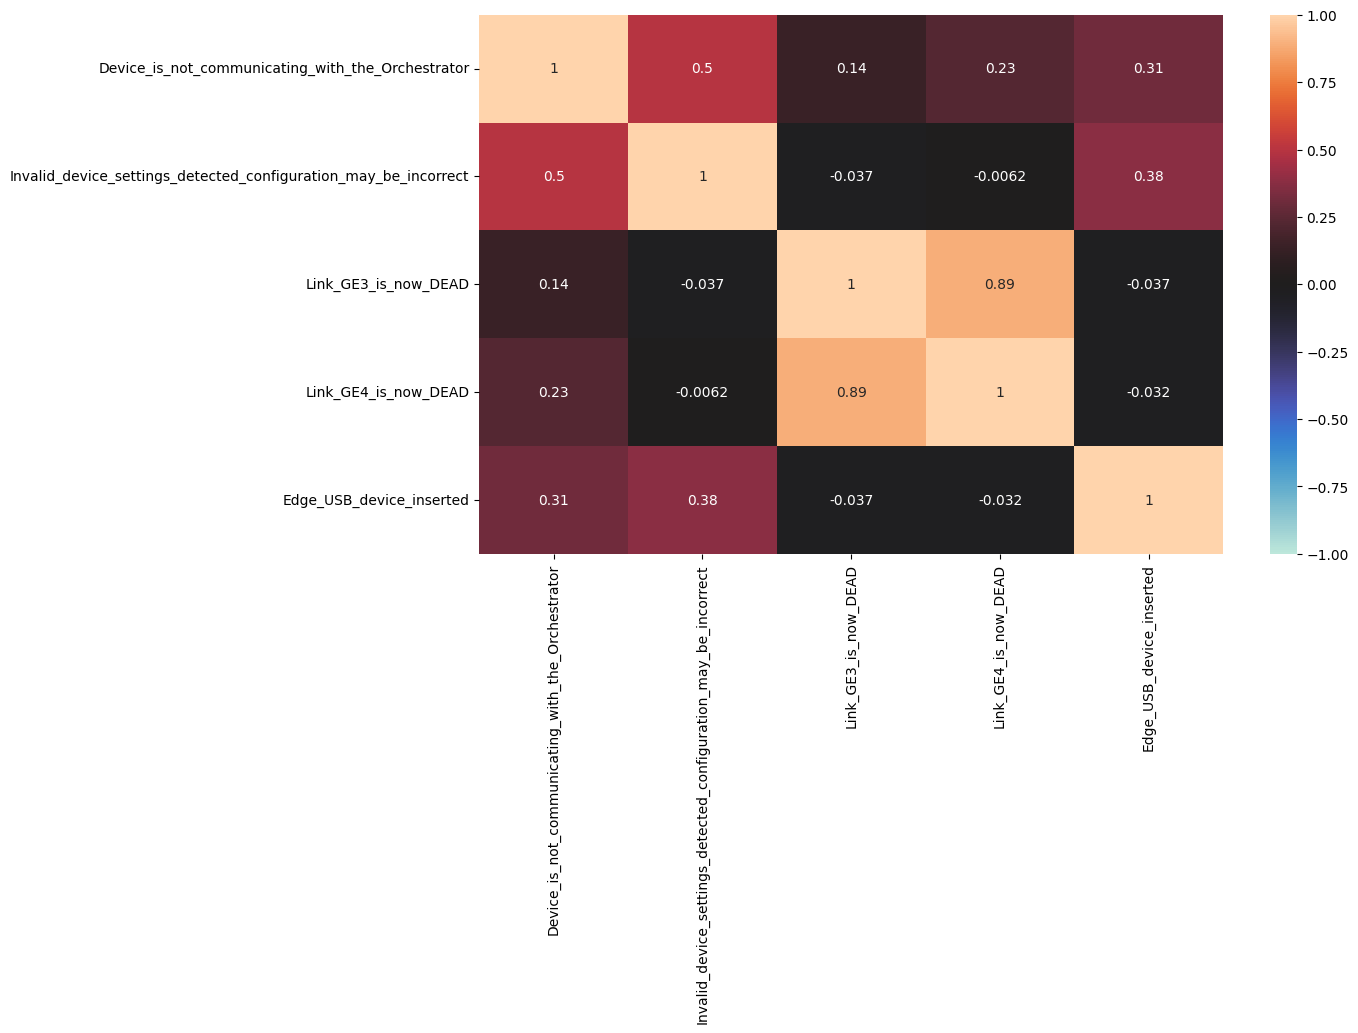

In [16]:
import seaborn as sns
plt.figure(figsize = (12,7))
corr =  cdf.corr()
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True)


In [5]:
cdf = cdf[(cdf['Device_is_not_communicating_with_the_Orchestrator']<80)]
cdf = cdf[(cdf['Invalid_device_settings_detected_configuration_may_be_incorrect']<70)]
cdf.reset_index(drop=True,inplace=True)

In [6]:
from sklearn.preprocessing import StandardScaler, Normalizer
scaler = StandardScaler()

Error_scaled = scaler.fit_transform(cdf)

Text(0, 0.5, 'PC2')

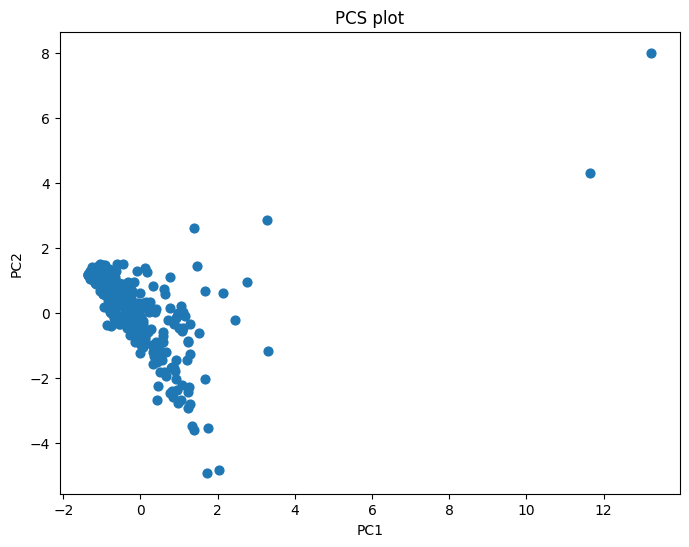

In [7]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
plt.figure(figsize=(8,6))
X_pca=pca.fit_transform(Error_scaled)
principal_cdf=pd.DataFrame(data=X_pca, columns=['PC1','PC2'])

plt.scatter(principal_cdf.iloc[:,0], principal_cdf.iloc[:,1], s=40)

plt.title('PCS plot')
plt.xlabel('PC1')
plt.ylabel('PC2')

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

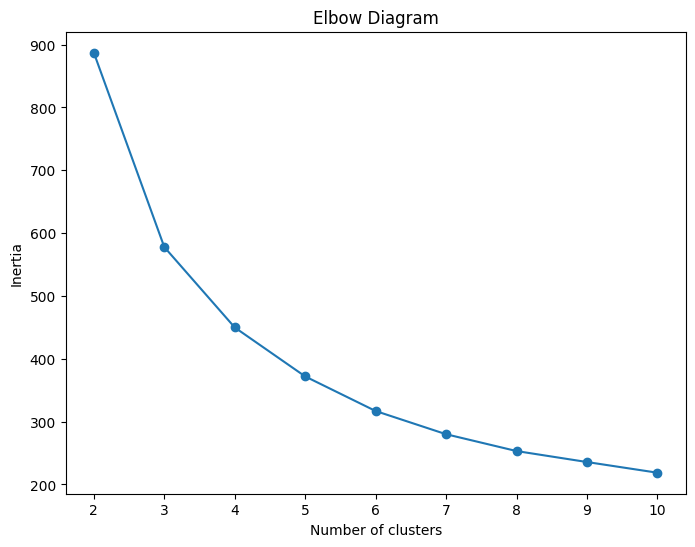

In [8]:
inertia=[]

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, n_init=15, max_iter=500, random_state=0)
    kmeans.fit(Error_scaled)
    inertia.append(kmeans.inertia_)
    plt.figure(figsize=(8,6))

plt.plot(range(2,11), inertia, marker='o')
plt.title('Elbow Diagram')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [9]:
pca = PCA(n_components=2)
X_pca=pca.fit_transform(Error_scaled)

principal_cdf=pd.DataFrame(data=X_pca, columns=['PC1','PC2'])

print(principal_cdf)
principal_cdf.head()

          PC1       PC2
0   -0.565911  0.625481
1   -0.597776  0.700190
2    0.235206  0.328210
3   -0.247272  0.522422
4   -0.454763  1.484979
..        ...       ...
251 -0.367260  0.457819
252  1.716542 -4.928847
253 -0.518506 -0.351435
254 -0.072730 -0.691011
255 -0.271559  0.008783

[256 rows x 2 columns]


,PC1,PC2
0,-0.565911,0.625481
1,-0.597776,0.700190
2,0.235206,0.328210
3,-0.247272,0.522422
4,-0.454763,1.484979


Text(0, 0.5, 'PC2')

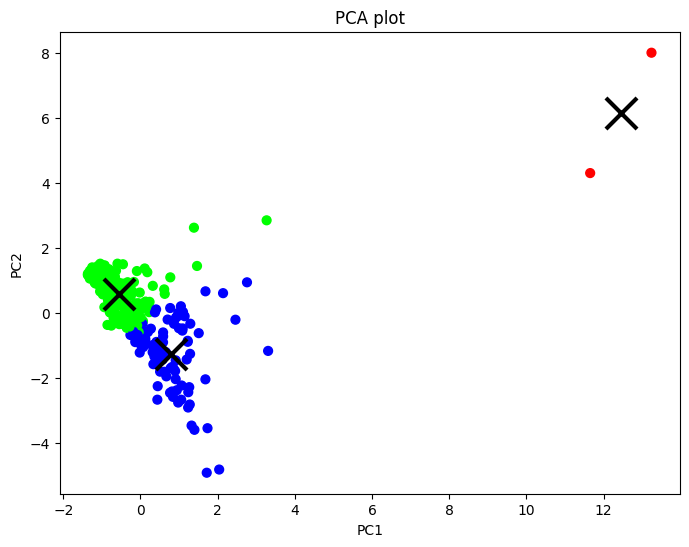

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init=15, max_iter=500, random_state=0)

clusters=kmeans.fit_predict(Error_scaled)

centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

plt.figure(figsize=(8,6))

plt.scatter(principal_cdf.iloc[:,0], principal_cdf.iloc[:,1], c=clusters, cmap="brg", s=40)

plt.scatter(x=centroids_pca[:,0], y=centroids_pca[:,1], marker="x", s=500, linewidths=3, color="black")


plt.title('PCA plot')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [11]:
silhouette_scores=[]

for k in range(2,11):
    kmeans=KMeans(n_clusters=k, n_init=15, max_iter=500, random_state=0)
    clusters=kmeans.fit_predict(Error_scaled)
    silhouette_scores.append(silhouette_score(Error_scaled, clusters))

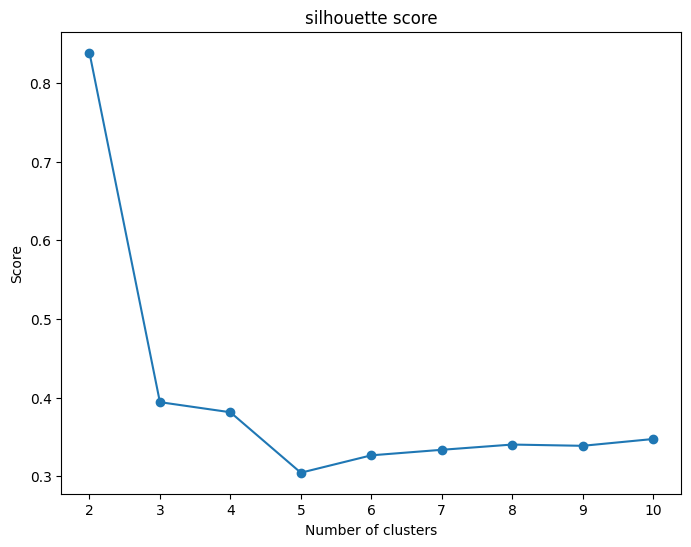

In [12]:
plt.figure(figsize=(8,6))
plt.plot(range(2,11), silhouette_scores, marker='o')
plt.title('silhouette score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()